In this part, developed a comprehensive set of visualizations using Python libraries such as Pandas, Seaborn, Matplotlib, and Plotly to analyze and present wage data effectively:

1. **Salary Distribution by Job Category**:
   - A boxplot to visually compare the distribution of salaries across different job categories. This helps in understanding which categories have higher wage variability and the presence of potential outliers.

2. **Correlation Heatmap**:
   - A heatmap displaying the correlation coefficients between different numerical variables in my dataset. This is useful for spotting relationships that could warrant further statistical testing or analysis.

3. **Average Salary by Gender and Marital Status**:
   - A bar graph showing how average salaries differ by gender and marital status. This visualization can reveal wage disparities and trends based on demographic factors.

4. **Salary Distribution Across Job Categories (Histograms)**:
   - A FacetGrid containing histograms for salary distributions within each job category, allowing for detailed analysis of the wage structure in different sectors.

5. **Interactive Scatter Plot of Salary vs. Work Experience**:
   - An interactive scatter plot created with Plotly, illustrating how salary correlates with work experience while using age as the size of the bubbles. This plot enhances user engagement and provides a dynamic way to explore data relationships.

6. **Pair Plot of Multiple Variables**:
   - A pair plot that showcases the relationships among salary, work experience, age, and education level across different job categories. This visualization is particularly useful for multidimensional data exploration.

7. **Heatmap for Categorical Data**:
   - A heatmap based on a crosstab of job categories and marital status, providing insights into the concentration of marital statuses across job categories.

In [1]:
import pandas as pd

# Load the dataset to understand its structure
file_path = '/Users/a1234/Desktop/workspace/Employment_Analysis_and_Recommendation_System_Based_on_NLP_and_Data_Modeling/data/processed_wage_sample_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and its summary statistics
data.head(), data.describe()

(   Salary  Sex  Race    Age  Edlevel   Work  Union  Time  Marr  Jobcat
 0    4943    1     0  61.33        8   2.92      0    84     1       1
 1    9001    0     0  41.55       12  23.22      0    62     1       1
 2   13380    0     0  31.91       19   6.88      0    67     0       4
 3    2585    1     1  36.09        8   5.82      0    78     0       3
 4   14865    1     0  32.92       16   6.75      0    81     0       4,
              Salary         Sex        Race         Age     Edlevel  \
 count    696.000000  696.000000  696.000000  696.000000  696.000000   
 mean    8303.166667    0.475575    0.225575   37.829382   13.449713   
 std     3474.792380    0.499762    0.418261   11.685221    2.862368   
 min     2259.000000    0.000000    0.000000   21.550000    8.000000   
 25%     5859.500000    0.000000    0.000000   28.970000   12.000000   
 50%     7663.000000    0.000000    0.000000   32.920000   12.000000   
 75%     9847.250000    1.000000    0.000000   46.500000   15.0

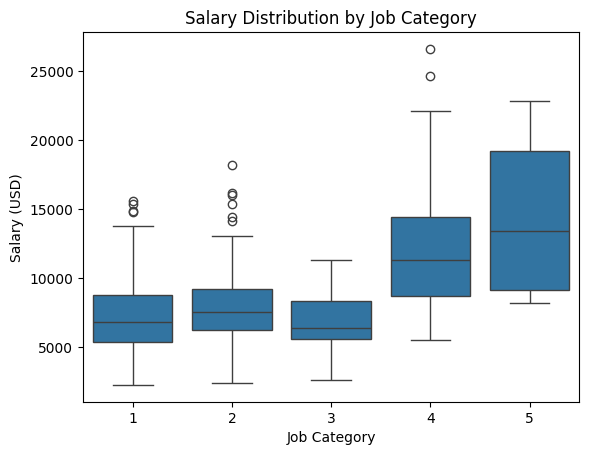

In [2]:
'''Salary Distribution by Job Category'''
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting salary distribution by job category
sns.boxplot(x='Jobcat', y='Salary', data=data)
plt.title('Salary Distribution by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Salary (USD)')
plt.show()


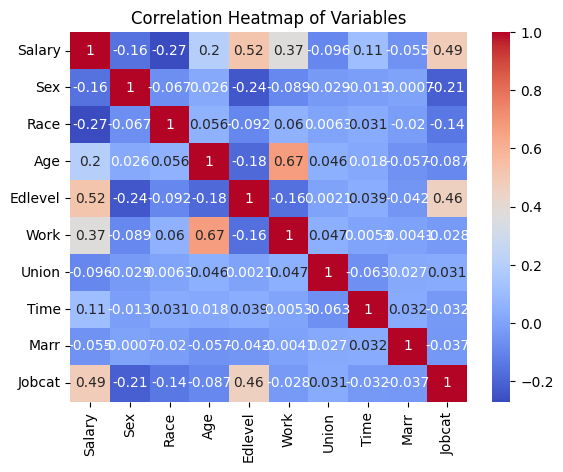

In [3]:
'''Correlation Heatmap'''
# Generating a heatmap of correlations between variables
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Variables')
plt.show()


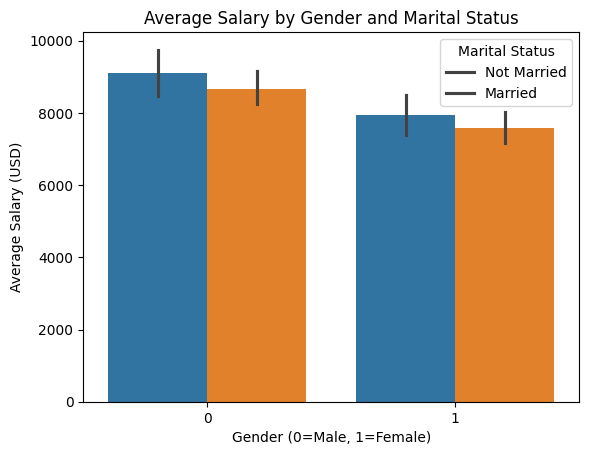

In [4]:
'''Bar Graph of Average Salary by Gender and Marital Status'''
# Bar graph of average salary by gender and marital status
sns.barplot(x='Sex', y='Salary', hue='Marr', data=data)
plt.title('Average Salary by Gender and Marital Status')
plt.xlabel('Gender (0=Male, 1=Female)')
plt.ylabel('Average Salary (USD)')
plt.legend(title='Marital Status', labels=['Not Married', 'Married'])
plt.show()


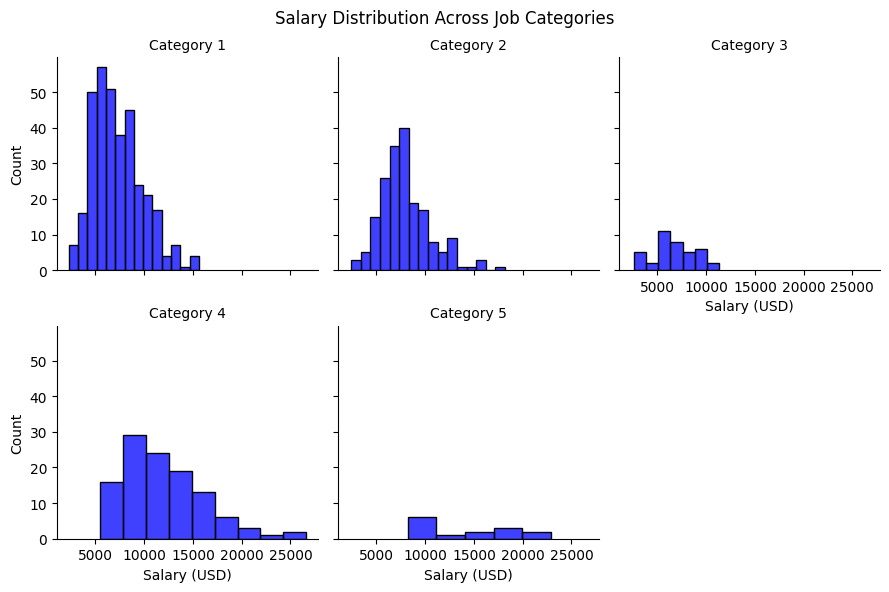

In [10]:
'''FacetGrid with histograms'''
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a FacetGrid with histograms for each job category based on salary
g = sns.FacetGrid(data, col='Jobcat', col_wrap=3, height=3)
g.map(sns.histplot, 'Salary', kde=False, color='blue')
g.set_titles('Category {col_name}')
g.set_axis_labels('Salary (USD)', 'Count')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Salary Distribution Across Job Categories')
plt.show()


In [5]:
'''Interactive Scatter Plot of Salary vs. Experience with Age as Bubble Size'''
import plotly.express as px

# Creating an interactive scatter plot
fig = px.scatter(data, x='Work', y='Salary', size='Age', color='Age',
                 hover_data=['Age', 'Jobcat'], title='Salary vs. Work Experience with Age as Bubble Size')
fig.update_layout(xaxis_title='Years of Work Experience', yaxis_title='Salary (USD)')
fig.show()


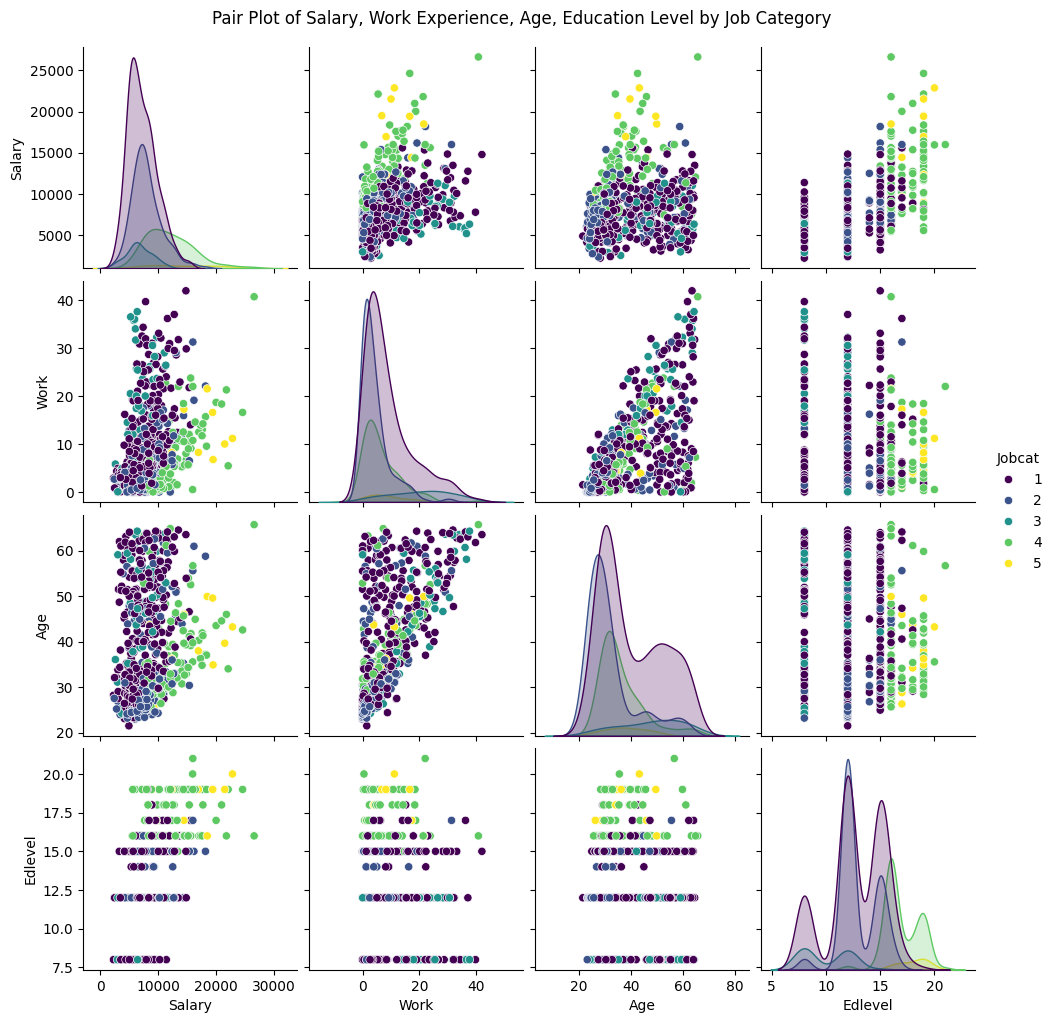

In [6]:
'''Pair Plot to Explore Relationships Among Multiple Variables'''
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting a subset of variables for clarity
subset_data = data[['Salary', 'Work', 'Age', 'Edlevel', 'Jobcat']]
sns.pairplot(subset_data, hue='Jobcat', palette='viridis')
plt.suptitle('Pair Plot of Salary, Work Experience, Age, Education Level by Job Category', y=1.02)
plt.show()


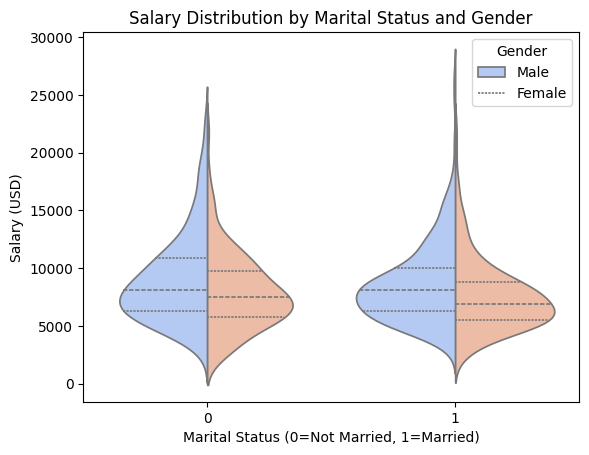

In [8]:
'''Violin Plot of Salary Distribution by Marital Status and Gender'''
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting violin plots
sns.violinplot(x='Marr', y='Salary', hue='Sex', data=data, split=True, inner='quartile', palette='coolwarm')
plt.title('Salary Distribution by Marital Status and Gender')
plt.xlabel('Marital Status (0=Not Married, 1=Married)')
plt.ylabel('Salary (USD)')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()


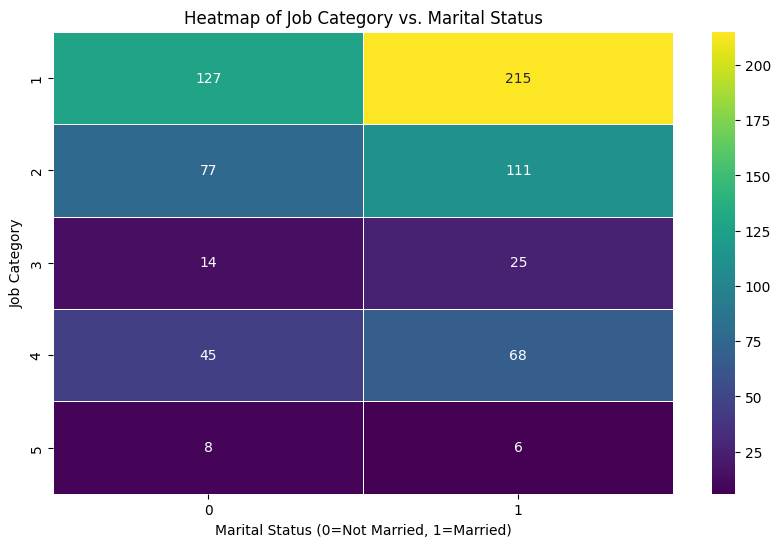

In [12]:
'''Heatmap with Annotations for Categorical Data'''
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Creating a crosstab of Job Category and Marital Status
jobcat_marr_ct = pd.crosstab(data['Jobcat'], data['Marr'])

# Plotting a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(jobcat_marr_ct, annot=True, fmt="d", cmap='viridis', linewidths=.5)
plt.title('Heatmap of Job Category vs. Marital Status')
plt.xlabel('Marital Status (0=Not Married, 1=Married)')
plt.ylabel('Job Category')
plt.show()
